In [1]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\Aspireit


# 1. User Interaction: 
• Is the user interface intuitive and easy to use? 
• Does the program effectively prompt the user for input and generate responses based on the 
input? 

In [2]:
import os
import pandas as pd
from transformers import pipeline

# Set your Hugging Face API token
HUGGINGFACE_API_TOKEN = 'your_huggingface_api_token'  # Replace with your actual token
os.environ['HUGGINGFACE_TOKEN'] = HUGGINGFACE_API_TOKEN

# Initialize the text generation model using Hugging Face
model_name = "gpt2"  # Change to "gpt-3" if you have access to that model
generator = pipeline('text-generation', model=model_name)

# Function to generate text using Hugging Face API
def generate_response(user_input):
    response = generator(user_input, max_length=150, num_return_sequences=1)[0]['generated_text']
    return response.strip()

# Load the conversation from CSV
def load_whatsapp_chat(file_path):
    try:
        loaded_table = pd.read_csv(file_path)
        print("\nLoaded conversation:")
        print(loaded_table.head())  # Display the first few rows for confirmation
        return loaded_table
    except Exception as e:
        print(f"Error loading the CSV file: {e}")
        return None

# Main chat loop
def chat_with_bot():
    csv_file_path = 'D:/Aspireit/whatsapp_data.csv'  # Update the path to your CSV file
    whatsapp_chat = load_whatsapp_chat(csv_file_path)
    
    if whatsapp_chat is None:
        print("Unable to load chat data. Exiting.")
        return

    print("Welcome to the Chatbot! Type 'exit' to end the conversation.")
    
    while True:
        user_input = input("You: ")
        
        if user_input.lower() == "exit":
            print("Goodbye!")
            break
        
        # Generate a response
        response = generate_response(user_input)
        print(f"Assistant: {response}")

# Run the chatbot
if __name__ == "__main__":
    chat_with_bot()


C:\Anaconda\envs\ai\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Loaded conversation:
         Date        Time          Name  \
0  01-06-2023    9:39 AM    Elil Greens   
1  01-06-2023    9:39 AM    Elil Greens   
2  01-06-2023    9:39 AM    Elil Greens   
3  01-06-2023   10:05 AM              🌚   
4  01-06-2023   10:08 AM    Elil Greens   

                                       Chat  
0                                        Hi  
1   I am Ezhilarasan from Greens technology  
2              When will u free pls call me  
3               Pls give the python content  
4                                        ok  
Welcome to the Chatbot! Type 'exit' to end the conversation.
You: Pls give the python content


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Assistant: Pls give the python content to the other python files and python-py, the Python engine.

If you're using cURL, cURL will set the URL path to your project directory. So you know why we have an all the python and python-py paths? Because that should work with cURL.

If you're using tbtr for Django, it will use this default URL and you will see the tbtr directory's directory with the contents of the TBBDIR. We want to exclude the directory from all of the resources in the tbtr package list so that it doesn't look like it's all in the same directory:

$ tbtr exclude tbtr.db $ t
You: exit
Goodbye!


# 2. Text Generation and Sentiment Analysis: 
• Are responses generated by the GPT-3 model contextually relevant and coherent? 
• How accurately does the program perform sentiment analysis on the generated responses?

In [3]:
import pandas as pd
from textblob import TextBlob

# Sample chat responses
responses = [
    "Hi",
    "I am Ezhilarasan from Greens technology",
    "When will u free pls call me",
    "Pls give the python content",
    "ok"
]

# Function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiment for each response
sentiments = [analyze_sentiment(response) for response in responses]

# Create a DataFrame for better handling
sentiment_df = pd.DataFrame({'Response': responses, 'Sentiment': sentiments})

# Count occurrences of each sentiment
sentiment_counts = sentiment_df['Sentiment'].value_counts()

# Print the sentiment results
print("Sentiment Analysis Report:")
print(sentiment_counts)

for response, sentiment in zip(responses, sentiments):
    print(f"Response: {response}\nSentiment: {sentiment}\n")


Sentiment Analysis Report:
Sentiment
Neutral     3
Positive    2
Name: count, dtype: int64
Response: Hi
Sentiment: Neutral

Response: I am Ezhilarasan from Greens technology
Sentiment: Neutral

Response: When will u free pls call me
Sentiment: Positive

Response: Pls give the python content
Sentiment: Neutral

Response: ok
Sentiment: Positive



# 3. Report Generation and Data Visualization: 
• Are the reports generated by the program informative and well-structured? 
• Do the data visualizations effectively represent the sentiment analysis results?

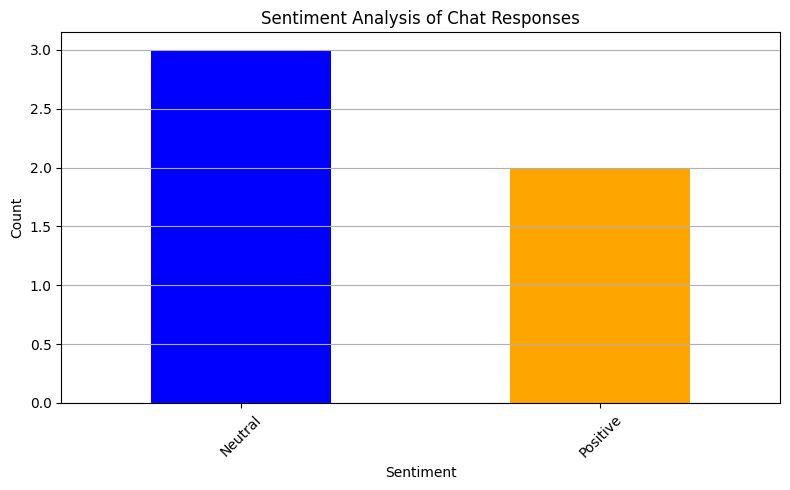

In [4]:
import matplotlib.pyplot as plt

# Visualization of sentiment counts
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Sentiment Analysis of Chat Responses')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('sentiment_analysis.png')  # Save the plot as a PNG file
plt.show()  # Show the plot